## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from math import ceil

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/home/runjing_liu/Documents/iRF/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [2]:
load_breast_cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=1000, 
                                                                             feature_weight=None)

## Check out the data

In [4]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 5 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 5 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 5 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [5]:
all_rf_tree_data = irf_utils.get_rf_tree_data(rf=rf,
                                              X_train=X_train, y_train=y_train, 
                                              X_test=X_test, y_test=y_test)

## STEP 3: Get the RIT data and produce RITs

In [6]:
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    random_state=12,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

In [7]:
#for i in range(100):
#    print(all_rit_tree_data['rit{}'.format(i)]['rit_leaf_node_union_value'])

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [8]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 22 (0.141571)
2. feature 23 (0.118066)
3. feature 27 (0.118023)
4. feature 20 (0.116496)
5. feature 7 (0.083462)
6. feature 3 (0.053727)
7. feature 2 (0.046495)
8. feature 0 (0.046333)
9. feature 6 (0.046172)
10. feature 13 (0.037305)
11. feature 26 (0.033145)
12. feature 21 (0.018278)
13. feature 25 (0.015116)
14. feature 5 (0.014100)
15. feature 10 (0.013705)
16. feature 1 (0.012798)
17. feature 24 (0.011960)
18. feature 12 (0.011029)
19. feature 28 (0.009534)
20. feature 29 (0.006791)
21. feature 4 (0.006139)
22. feature 16 (0.005647)
23. feature 17 (0.005003)
24. feature 14 (0.004568)
25. feature 11 (0.004414)
26. feature 18 (0.004412)
27. feature 19 (0.004295)
28. feature 15 (0.003972)
29. feature 9 (0.003792)
30. feature 8 (0.003654)


### Plot Ranked Feature Importances

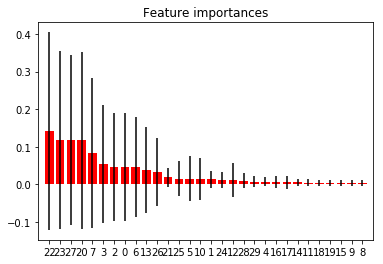

In [9]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

In [10]:
# Now plot the trees individually
#irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [11]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [12]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [13]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

# Wrapper function for iRF

In [14]:
def get_stability_score(all_rit_bootstrap_output):
    """
    Get the stabilty score from B bootstrap Random Forest
    Fits with RITs
    """
    
    # Initialize values
    bootstrap_interact = []
    B = len(all_rit_bootstrap_output)
    
    for b in range(B):
        rit_counts = irf_utils.rit_interactions(
            all_rit_bootstrap_output['rf_bootstrap{}'.format(b)])
        rit_counts = list(rit_counts.keys())        
        bootstrap_interact.append(rit_counts)        
    
    flatten = lambda l: [item for sublist in l for item in sublist]
    all_rit_interactions = flatten(bootstrap_interact)
    stability = {m:all_rit_interactions.count(m)/B for m in all_rit_interactions}
    return stability

In [15]:
from datetime import datetime

print(datetime.now())

for b in range(3):

    # Take a bootstrap sample from the training data
    # based on the specified user proportion
    X_train_rsmpl, y_rsmpl = resample(
        X_train, y_train, n_samples=3, random_state=0)

    print("iteration {}".format(b), X_train_rsmpl.shape[0],
     y_rsmpl.shape[0])
    print(np.sum(X_train_rsmpl))
    print(np.sum(y_rsmpl))

2017-05-25 15:15:43.214549
iteration 0 3 3
5611.559593
2
iteration 1 3 3
5611.559593
2
iteration 2 3 3
5611.559593
2


In [18]:
def run_rit(X_train,
            X_test,
            y_train,
            y_test,
            K=7,
            n_estimators=20,
            B=10,
            random_state_classifier=2018,
            propn_n_samples=0.2,
            bin_class_type=1,
            random_state=12,
            M=4,
            max_depth=2,
            noisy_split=False,
            num_splits=2,
            n_estimators_bootstrap=5):
    """ 
    Runs the iRF algorithm in full.
    
    
    Parameters
    --------
    X_train : array-like or sparse matrix, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.

    X_test : array-like or sparse matrix, shape = [n_samples, n_features]
        Test vector, where n_samples in the number of samples and
        n_features is the number of features.
    
    y_train : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values for training.

    y_test : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values for testing.

    
    K : int, optional (default = 7)
        The number of iterations in iRF. 
    
    n_estimators : int, optional (default = 20)
        The number of trees in the random forest when computing weights. 
        
    B : int, optional (default = 10)
        The number of bootstrap samples
    
    random_state_classifier : int, optional (default = 2018)
        The random seed for reproducibility. 
    
    propn_n_samples : float, optional (default = 0.2)
        The proportion of samples drawn for bootstrap. 
    
    bin_class_type : int, optional (default = 1)
        ...
    
    max_depth : int, optional (default = 2)
        The built tree will never be deeper than `max_depth`.

    num_splits : int, optional (default = 2)
            At each node, the maximum number of children to be added.

    noisy_split: bool, optional (default = False)
        At each node if True, then number of children to
        split will be (`num_splits`, `num_splits + 1`)
        based on the outcome of a bernoulli(0.5)
        random variable    
        
    n_estimators_bootstrap : int, optional (default = 5)
        The number of trees in the random forest when fitting to bootstrap samples
        
    Returns 
    --------
    all_rf_weights: dict
        stores feature weights across all iterations
        
    all_rf_bootstrap_output: dict
        stores rf information across all bootstrap samples
        
    all_rit_bootstrap_output: dict
        stores rit information across all bootstrap samples
    
    stability_score: dict
        stores interactions in as its keys and stabilities scores as the values
    
    """

    # Set the random state for reproducibility
    np.random.seed(random_state_classifier)

    # Convert the bootstrap resampling proportion to the number
    # of rows to resample from the training data
    n_samples = ceil(propn_n_samples * X_train.shape[0])

    # Initialize dictionary of rf weights
    # CHECK: change this name to be `all_rf_weights_output`
    all_rf_weights = {}

    # Initialize dictionary of bootstrap rf output
    all_rf_bootstrap_output = {}

    # Initialize dictionary of bootstrap RIT output
    all_rit_bootstrap_output = {}

    for k in range(K):
        if k == 0:

            # Initially feature weights are None
            feature_importances = None

            # Update the dictionary of all our RF weights
            all_rf_weights["rf_weight{}".format(k)] = feature_importances

            # fit RF feature weights i.e. initially None
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

        else:
            # fit weighted RF
            # Use the weights from the previous iteration
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

    # Run the RITs
    for b in range(B):

        # Take a bootstrap sample from the training data
        # based on the specified user proportion
        X_train_rsmpl, y_rsmpl = resample(
            X_train, y_train, n_samples=n_samples)
        
        print(n_samples)
        print("iteration {}".format(b), X_train_rsmpl.shape[0],
         y_rsmpl.shape[0])
        print(np.sum(X_train_rsmpl))
        print(np.sum(y_rsmpl))
        
        # Set up the weighted random forest
        # Using the weight from the (K-1)th iteration i.e. RF(w(K))
        rf_bootstrap = RandomForestClassifier(
            #CHECK: different number of trees to fit for bootstrap samples
            n_estimators=n_estimators_bootstrap)

        # Fit RF(w(K)) on the bootstrapped dataset
        rf_bootstrap.fit(
            X=X_train_rsmpl,
            y=y_rsmpl,
            feature_weight=all_rf_weights["rf_weight{}".format(K)])
        
        # All RF tree data
        # CHECK: why do we need y_train here?
        all_rf_tree_data = irf_utils.get_rf_tree_data(
            rf=rf_bootstrap,
            X_train=X_train_rsmpl,
            y_train=y_rsmpl,
            X_test=X_test,
            y_test=y_test)
        
        #print(all_rf_tree_data['feature_importances'])
        
        # Update the rf bootstrap output dictionary
        all_rf_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rf_tree_data

        # Run RIT on the interaction rule set
        # CHECK - each of these variables needs to be passed into
        # the main run_rit function
        all_rit_tree_data = irf_utils.get_rit_tree_data(
            all_rf_tree_data=all_rf_tree_data,
            bin_class_type=bin_class_type,
            #random_state=12,
            M=M,
            max_depth=max_depth,
            noisy_split=noisy_split,
            num_splits=num_splits)
        
        
        #print(all_rit_tree_data['rit0']['rit_intersected_values'])
        
        # Update the rf bootstrap output dictionary
        # We will reference the RIT for a particular rf bootstrap
        # using the specific bootstrap id - consistent with the
        # rf bootstrap output data
        all_rit_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rit_tree_data

    stability_score = get_stability_score(all_rit_bootstrap_output=all_rit_bootstrap_output)
    
    return all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output, stability_score

# Run the iRF function

In [20]:
all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output, stability_score =\
run_rit(X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        K=5,
        n_estimators=20,
        B=10,
        random_state_classifier=2018,
        propn_n_samples=.2,
        bin_class_type=1,
        random_state=12,
        M=4,
        max_depth=2,
        noisy_split=False,
        num_splits=2,
        n_estimators_bootstrap=5)
print(all_rf_weights)

103
iteration 0 103 103
178866.00012
74
103
iteration 1 103 103
191941.84444
66
103
iteration 2 103 103
199697.68086
61
103
iteration 3 103 103
198420.123802
63
103
iteration 4 103 103
196783.235961
64
103
iteration 5 103 103
209298.1465
56
103
iteration 6 103 103
205676.56003
66
103
iteration 7 103 103
222079.581694
61
103
iteration 8 103 103
188156.517015
64
103
iteration 9 103 103
216267.959697
59
{'rf_weight1': array([ 0.0378531 ,  0.01143301,  0.00917885,  0.0389645 ,  0.00570286,
        0.00355542,  0.04189169,  0.04736217,  0.00276282,  0.00375928,
        0.00758323,  0.00132309,  0.00668335,  0.00753545,  0.0027825 ,
        0.0043194 ,  0.00388132,  0.00557761,  0.00168787,  0.00332904,
        0.26950483,  0.01216281,  0.12508337,  0.16629184,  0.01540501,
        0.00929946,  0.03860752,  0.0959075 ,  0.01366094,  0.00691016]), 'rf_weight3': array([  4.21601714e-03,   2.82245685e-03,   3.77955313e-04,
         5.82852294e-04,   0.00000000e+00,   0.00000000e+00,
         2.

In [100]:
stability_score

{'0_27': 0.1,
 '10_20_23_27': 0.1,
 '20': 0.5,
 '20_22_27': 0.1,
 '20_26': 0.2,
 '20_27': 0.1,
 '22': 0.2,
 '22_23': 0.1,
 '22_27': 0.2,
 '23': 0.3,
 '23_25_26_28': 0.1,
 '23_27': 0.1,
 '26': 0.2,
 '27': 0.6,
 '3_20': 0.1,
 '3_6': 0.2,
 '6': 0.1,
 '6_20': 0.1,
 '6_23_27_28': 0.1,
 '6_7': 0.1,
 '7_15_20': 0.1,
 '7_20': 0.1,
 '7_20_27': 0.1,
 '7_23': 0.2,
 '7_23_26': 0.1}

In [101]:
B = 10
for i in range(B):
    rit_output = all_rit_bootstrap_output['rf_bootstrap{}'.format(i)]
    interactions = irf_utils.rit_interactions(rit_output)
    print('rf_bootstrap{}'.format(i), interactions)

rf_bootstrap0 {'10_20_23_27': 2, '0_27': 1, '23': 1, '22_23': 2, '27': 1, '22': 2}
rf_bootstrap1 {'20_26': 2, '22_27': 2, '7_15_20': 1, '20': 3}
rf_bootstrap2 {'7_20': 1, '3_20': 2, '27': 2, '20': 3}
rf_bootstrap3 {'20_26': 2, '22_27': 2, '27': 1, '7_20_27': 1, '20': 3}
rf_bootstrap4 {'6_7': 1, '26': 1, '3_6': 1, '6_20': 2, '6': 1}
rf_bootstrap5 {'3_6': 2, '22': 2, '20': 1}
rf_bootstrap6 {'23': 4, '27': 2}
rf_bootstrap7 {'7_23': 1, '23': 3, '20_22_27': 2, '23_25_26_28': 2, '26': 2}
rf_bootstrap8 {'7_23_26': 2, '7_23': 2, '27': 2}
rf_bootstrap9 {'23_27': 1, '27': 3, '20_27': 2, '6_23_27_28': 2, '20': 2}


In [97]:
all_rit_bootstrap_output['rf_bootstrap1']['rit2']

{'rit': <utils.irf_utils.RITTree at 0x7f837a975f28>,
 'rit_intersected_values': [array([ 4, 22])],
 'rit_leaf_node_union_value': array([ 4, 22]),
 'rit_leaf_node_values': [array([ 4, 22])]}

In [56]:
all_rit_counts = []
for i in range(10):
    rit_counts = irf_utils.rit_interactions(
        all_rit_bootstrap_output['rf_bootstrap{}'.format(i)])
    rit_counts = rit_counts.fromkeys(rit_counts, 1)
    all_rit_counts.append(rit_counts)

## Run iRF for just 1 iteration - should be the uniform sampling version

In [49]:
all_rf_weights_1iter, all_rf_bootstrap_output_1iter, all_rit_bootstrap_output_1iter =\
run_rit(X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        K=1,
        n_estimators=1000,
        B=10,
        random_state_classifier=2018,
        propn_n_samples=0.2,
        bin_class_type=1,
        random_state=12,
        M=4,
        max_depth=2,
        noisy_split=False,
        num_splits=2)

In [55]:
print(all_rf_weights_1iter['rf_weight1'])

[ 0.04633261  0.01279795  0.04649524  0.05372707  0.00613899  0.01410021
  0.04617194  0.08346155  0.00365378  0.00379191  0.01370514  0.00441408
  0.01102853  0.03730455  0.00456819  0.00397247  0.00564707  0.00500305
  0.00441179  0.00429459  0.11649582  0.01827778  0.14157085  0.11806595
  0.01195991  0.01511598  0.03314478  0.11802327  0.00953361  0.00679134]


## Compare to the original single fitted random forest (top of the notebook)!

In [60]:
rf.feature_importances_

array([ 0.04633261,  0.01279795,  0.04649524,  0.05372707,  0.00613899,
        0.01410021,  0.04617194,  0.08346155,  0.00365378,  0.00379191,
        0.01370514,  0.00441408,  0.01102853,  0.03730455,  0.00456819,
        0.00397247,  0.00564707,  0.00500305,  0.00441179,  0.00429459,
        0.11649582,  0.01827778,  0.14157085,  0.11806595,  0.01195991,
        0.01511598,  0.03314478,  0.11802327,  0.00953361,  0.00679134])

## These look like they match as required!

In [61]:
rf_weight5 = np.ndarray.tolist(all_rf_weights['rf_weight1'])
rf_weight5

[0.03785310470431957,
 0.011433014482771538,
 0.009178847665561797,
 0.038964497097170335,
 0.005702864300092174,
 0.0035554200305757616,
 0.041891686998428004,
 0.04736216645722789,
 0.0027628245777236277,
 0.003759277392257268,
 0.0075832267680531916,
 0.0013230930451214183,
 0.006683350681223972,
 0.007535448498366222,
 0.0027824980670987315,
 0.0043193967779257,
 0.0038813156721859963,
 0.005577613495435727,
 0.0016878723423762096,
 0.003329040950739148,
 0.2695048270955845,
 0.012162811436513673,
 0.1250833695561254,
 0.16629184413751788,
 0.015405008680302696,
 0.00929945634990437,
 0.03860751552331201,
 0.09590750167873455,
 0.013660944440826783,
 0.006910161096523803]

#

In [48]:
sorted([i for i, e in enumerate(rf_weight10) if e != 0])

[1, 7, 12, 13, 20, 21, 22, 23, 26, 27]

{'rf_weight0': None,
 'rf_weight1': array([ 0.10767154,  0.00899294,  0.04092015,  0.02001948,  0.00387857,
         0.00461486,  0.01078431,  0.04536844,  0.00452756,  0.00619205,
         0.00808735,  0.00440133,  0.0287609 ,  0.01211674,  0.00581382,
         0.00285006,  0.0041309 ,  0.00331072,  0.00168265,  0.00553938,
         0.14002331,  0.01362173,  0.17859298,  0.05971482,  0.00724069,
         0.01703418,  0.09629764,  0.1408401 ,  0.01194766,  0.00502317]),
 'rf_weight2': array([  4.44435012e-02,   3.40469419e-03,   4.96289277e-03,
          3.15592324e-03,   0.00000000e+00,   0.00000000e+00,
          2.34638107e-03,   8.55088015e-02,   0.00000000e+00,
          2.00859319e-03,   1.59775615e-03,   4.19349026e-04,
          7.67580520e-03,   2.78187346e-03,   1.09017353e-04,
          2.72543383e-04,   3.79613998e-04,   0.00000000e+00,
          2.23560029e-03,   1.36390833e-03,   1.44290207e-01,
          6.75257965e-03,   3.71650639e-01,   1.57358155e-01,
          1.615